# Báo cáo Project
Lớp TTNT-162279, Nhóm G03

---

## I. Thông tin chung

### Thành viên
- Trần Phương Nam 20235176
- Nguyễn Tất Lê Huy 20235109
- Đặng Phan Bình 20235273
- Đỗ Xuân Hoàng 20235084

### Lịch thực hiện
- W02: Đăng ký nhóm 
- W03: Đề xuất project (28/9)
- W08: Báo cáo tiến độ giữa kỳ (1/11)
- W15: Hoàn thành và gửi báo cáo project (20/12)
- W16-18: Trình bày project, Q&A

---

## II. Đề xuất project (W3)

### Bài toán
- Xây dựng tác tử AI chơi Connect Four (6x7) theo mô hình MAX vs MIN, người chơi đi trước (MAX), máy là đối thủ (MIN).
- Mục tiêu: cài đặt Minimax + Alpha-Beta pruning, thiết kế hàm lượng giá (evaluation) mạnh, so sánh hiệu năng của thuật toán với tiêu chí đánh giá là thời gian chạy, số nút mở rộng, tỉ lệ cắt tỉa, tỉ lệ cache hit tương ứng với độ sâu của thuật toán tìm kiếm

### Phương pháp


#### 1. Mô hình hoá trò chơi
- Trạng thái: ma trận 6×7; nước đi hợp lệ là các cột chưa đầy; rơi xuống ô trống thấp nhất.
- Kết thúc: 
    - Một người thắng khi có 4 quân liên tiếp (ngang/dọc/chéo)
    - Hòa cờ nếu bảng bị điền full toàn bộ


#### 2. Thuật toán tìm kiếm
- Minimax với giới hạn độ sâu d (d = 4–8 tuỳ cấu hình).
- Alpha-Beta pruning để giảm số nút duyệt.


#### 3. Hàm lượng giá (Evaluation)
- Đếm "cửa thắng" theo các cửa sổ 4 ô (windows) và gán trọng số:
    - 4 của MAX: +∞ (thắng ngay). 4 của MIN: −∞.
    - 3-trên-4 mở (MAX/MIN): +/− 50.
    - 2-trên-4 mở (MAX/MIN): +/− 5.

- Trừ mạnh các "nước thua ngay" (nếu thả sẽ để MIN thắng ở lượt sau).
- Công thức tạm thời (khi chưa kết thúc):
```
score =   50*threeMAX + 5*twoMAX
        - 50*threeMIN - 5*twoMIN
```
- Với những bộ 3 liên tiếp, sẽ tính bao gồm luôn cả 2 bộ 2 liên tiếp ở trong đó luôn để đơn giản hóa việc code



#### 4. Thực nghiệm
- Độ sâu: d = 4, 5, 6, 7, 8
- Chỉ số báo cáo: Thời gian nghĩ của máy, số nút mở rộng, tỉ lệ cắt tỉa (pruning rate), tỉ lệ cache hit.



#### 5. Kết luận kỳ vọng
- Alpha-Beta giảm thời gian đáng kể, đặc biệt khi thứ tự hoá nước đi tốt.
- Độ sâu cao hơn không tuyến tính với lợi ích: d = 7 thường là "điểm ngọt" cho máy có cấu hình tầm trung.

### Phân công ban đầu

#### Trần Phương Nam – Phần 1: Tổng quan & Mô hình hoá (Report + Hình)
- Viết “Giới thiệu Connect Four”, luật, trạng thái, điều kiện thắng/hoà, không gian trạng thái.
- Vẽ hình bảng 7x6, minh hoạ 4-in-a-row, ví dụ nước đi rơi xuống.
- Bàn về zero-sum, perfect-information, vì sao hợp với Minimax.
- Mục tiêu: Mục 1 trong report + 2 hình minh hoạ PNG/SVG.


#### Nguyễn Tất Lê Huy– Phần 2: Thuật toán & Evaluation (Report + Code)
- Trình bày Minimax, Alpha-Beta (pseudocode, độ phức tạp).
- Thiết kế evaluation: tiêu chí, cách đếm window 4 ô, ưu tiên trung tâm, phát hiện “nước thua ngay”.
- Viết module evaluate(board), generate_moves(board), is_win/terminal.
- Mục tiêu: Mục 2 report + file evaluation.py, test đơn vị cho hàm đếm.


#### Đặng Phan Bình– Phần 3: Cài đặt & Thực nghiệm (Code + Bảng/Đồ thị)
- Hiện thực minimax() + alphabeta() (có move ordering).
- Script chạy batch: thay depth ∈ {4,6,8}, mở đầu ∈ {center, near-center, edge}, 20 seed/vế.
- Log nodes expanded, time, win/lose/draw.
- Tạo bảng & biểu đồ: Win rate vs depth; Time vs depth; Nodes vs depth; Pruning rate.
- Mục tiêu: Mục 3 report + experiments.ipynb/.py + CSV kết quả + 3 biểu đồ PNG.


#### Đỗ Xuân Hoàng– Phần 4: Phân tích & Kết luận (Report + Biên tập)
- Phân tích kết quả: tại sao center tốt, vì sao Alpha-Beta thắng về time, ảnh hưởng của ordering.
- Nêu hạn chế (horizon effect, evaluation local), hướng mở (iterative deepening, TT/Zobrist, MCTS).
- Biên tập tổng thể, chuẩn hoá hình/bảng, trích dẫn, format.
- Mục tiêu: Mục 4 report (Thảo luận & Kết luận), file PDF hoàn chỉnh.



## III. Tiến độ giữa kỳ (W8)

### Chương trình
[Repo github của bài tập lớn](https://github.com/ppap-1264589/Drop4_AI)

Trong repo là code bằng cách hướng đối tượng. Trong cập nhật báo cáo cuối kì, đã chuyển về dạng hướng thủ tục để dễ hiểu hơn

### Kết quả

Hiện tại, trò chơi có tính năng người chơi với máy thay phiên nhau nhập số cột để thả quân cờ, với mục tiêu xếp được 4 quân cờ liên tiếp theo hàng ngang, dọc hoặc chéo.

### Giao diện
Trò chơi đang tận dụng trực tiếp Terminal của Visual Studio Code. Bàn cờ được hiển thị dưới dạng văn bản với các ký tự đại diện cho ô trống và quân cờ của từng người chơi.

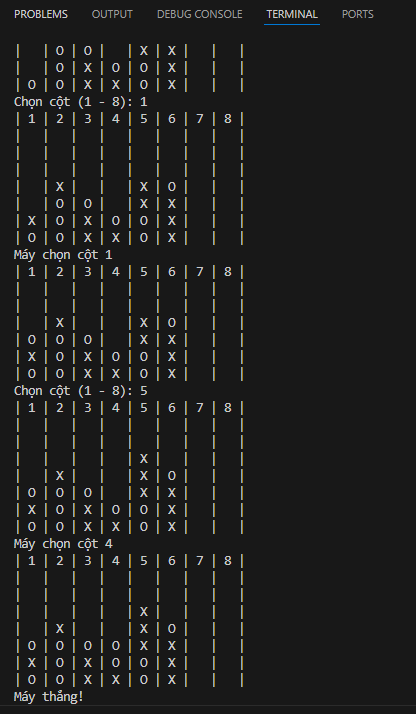

### Phân tích

Một số tham số cài đặt ban đầu được thiết kế trực tiếp trong hàm main khi chạy trò chơi

- `rows`, `cols`: số hàng, số cột của bảng
- `depth_search`: độ sâu của thuật toán tìm kiếm Minimax
- `player_first` = True: cho phép người dùng là người chơi đầu tiên
- `player_mark`: Quân cờ của người dùng
- `computer_mark`: Quân cờ của máy tính

Hệ thống khởi tạo trò chơi thông qua việc thực hiện phương thức `play_game()` của đối tượng game (tư duy giống lập trình hướng đối tượng)

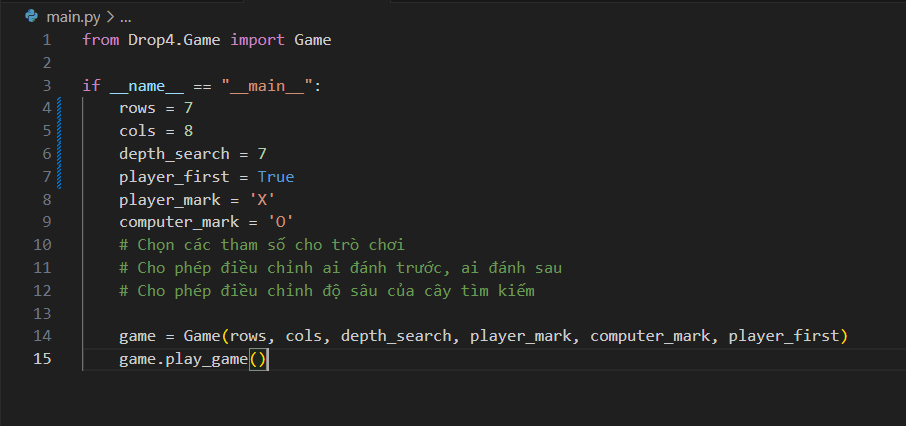


Trong Logic chính của game, người chơi và máy sẽ luân phiên chơi sau mỗi lần đặt được một quân cờ vào một cột nào đó

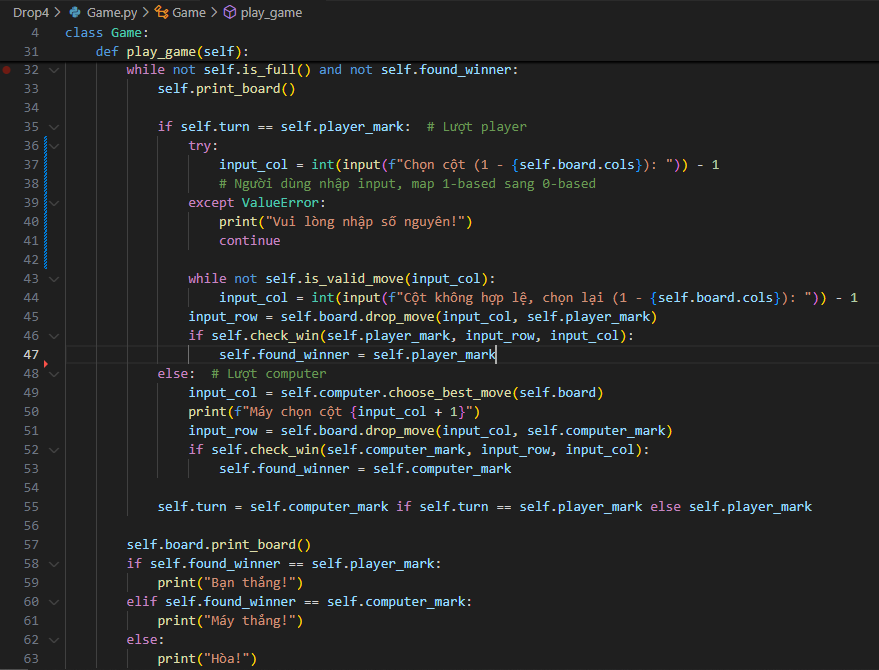

Trong Board, cài đặt một số định nghĩa quan trọng:

- `is_full`: xảy ra khi tham số `remain = 0` (khi không còn một ô trống nào nào lại trên bản cờ nữa)
- `drop_move(col, token)`: thả một quân cờ có kí hiệu `token` vào cột thứ `col`
- `undo_move(col)`: rút lại một quân cờ đã thả ở cột thứ `col`. Hàm này cần thiết trong quá trình trả đệ quy trong quá trình tìm kiếm giá trị Minimax.
- Ngoài ra còn một số hàm khác như `get_valid_moves()` để tìm tất cả các cột khả thi cho máy tính, `print_board()` để hiển thị kết quả ván đấu sau mỗi lần chọn nước đi,...

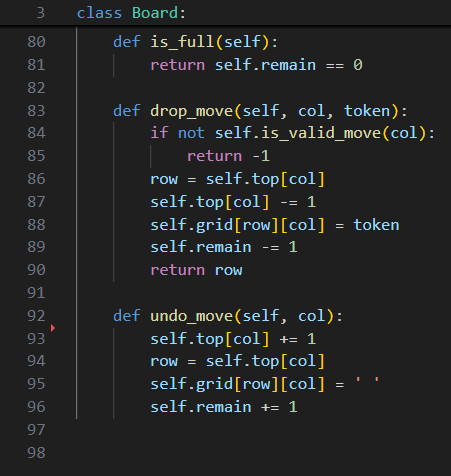


Phần quan trọng nhất của trò chơi là thuật toán của máy tính. Các thuật toán quan trọng được cài đặt trong lớp `Computer`

Về cơ bản, tại nước đi của máy, máy sẽ thực hiện ba thao tác sau:
1. Tìm tất cả các cột có thể thả quân cờ của mình vào
2. Với mỗi cột khả thi để thả quân, máy sẽ tính giá trị Minimax sau khi thả quân cờ của mình vào cột đó
3. Tìm ra cột có giá trị Minimax nhỏ nhất (máy tính là người chơi MIN) để thực hiện thả quân và hiển thị kết quả ra màn hình

Việc đệ quy tính giá trị Minimax được cài đặt qua hàm `_minimax()` 

Việc xác định điểm số tại nút lá trên cây trò chơi được tính qua hàm `_evaluate()`

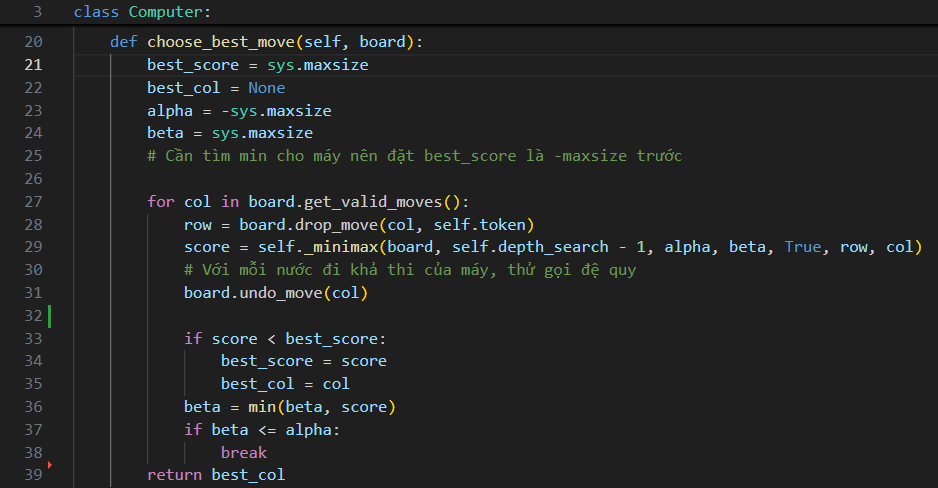

### Vấn đề gặp phải

- Giao diện của trò chơi còn hơi bất tiện do sử dụng trực tiếp Terminal trên VSCode
- Nếu độ sâu của cây tìm kiếm lên đến 8-9 thì máy tính bị chậm lại, gây khó khăn trong quá trình chơi

## IV. Cập nhật kết quả cuối kỳ (W15)

### Cập nhật lại phân công, khối lượng công việc
<!-- công việc của các thành viên, tỷ lệ đóng góp của các thành viên -->

#### Trần Phương Nam – Tổng quan & Mô hình hoá (20%)
- Viết “Giới thiệu Connect Four”, luật, trạng thái, điều kiện thắng/hoà, không gian trạng thái.
- Mục tiêu: Giới thiệu bài toán và hình minh họa.


#### Đỗ Xuân Hoàng – Thuật toán (30%)
- Trình bày Minimax, Alpha-Beta (pseudocode, độ phức tạp).
- Mục tiêu: Tìm hiểu các hàm tạo Board, Computer và Game


#### Đặng Phan Bình – Làm biểu đồ (30%)
- Tạo bảng & biểu đồ: Time vs depth; Nodes vs depth; Pruning rate; Cache hit rate bằng cách chơi với máy một trận bình thường
- Mục tiêu: Hoàn thiện code, tạo biểu đồ so sánh.


#### Nguyễn Tất Lê Huy – Phân tích & Kết luận (20%)
- Phân tích kết quả: Vì sao Alpha-Beta tốt, giải thích các hoạt động của transition table (bảng cache)
- Mục tiêu: Hoàn thiện file báo cáo.

### Cập nhật lại chương trình

Để tránh khó hiểu, chương trình được cập nhật lại dưới dạng hướng thủ tục.

[Thư mục update cuối kì](https://github.com/ppap-1264589/Drop4_AI/tree/main/UpdateCuoiKi)

In [1]:
import random
import sys
import time

# ==========================================
# 1. CÁC HÀM QUẢN LÝ BẢNG (BOARD FUNCTIONS)
# ==========================================

def create_board(rows, cols):
    """Khởi tạo các thành phần của bảng game"""
    grid = [[' ' for _ in range(cols)] for _ in range(rows)]
    top = [rows - 1 for _ in range(cols)]
    remain = rows * cols
    return grid, top, remain

def print_board(grid, rows, cols):
    """In bảng ra màn hình"""
    col_names = [str(i) for i in range(1, cols + 1)]
    print("\n| " + " | ".join(col_names) + " |")
    for row in grid:
        print("| " + " | ".join(row) + " |")
    print("-" * (cols * 4 + 1))

def is_valid_move(grid, col, cols):
    """Kiểm tra cột chọn có hợp lệ không"""
    return 0 <= col < cols and grid[0][col] == ' '

def get_valid_moves(grid, cols):
    """Lấy danh sách các cột còn trống"""
    moves = [col for col in range(cols) if is_valid_move(grid, col, cols)]
    return moves

def drop_move(grid, top, col, token):
    """Thực hiện thả quân cờ vào cột"""
    row = top[col]
    top[col] -= 1
    grid[row][col] = token
    return row

def undo_move(grid, top, col):
    """Hoàn tác nước đi"""
    top[col] += 1
    row = top[col]
    grid[row][col] = ' '

def check_win(grid, rows, cols, token, r, c):
    """Kiểm tra xem nước đi tại (r, c) có tạo thành chuỗi 4 không"""
    if r < 0 or grid[r][c] != token:
        return False

    directions = [(0, 1), (1, 0), (1, 1), (1, -1)]
    for dr, dc in directions:
        count = 1
        # Kiểm tra hướng tới
        for i in range(1, 4):
            nr, nc = r + i * dr, c + i * dc
            if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == token:
                count += 1
            else: break
        # Kiểm tra hướng ngược lại
        for i in range(1, 4):
            nr, nc = r - i * dr, c - i * dc
            if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == token:
                count += 1
            else: break
        if count >= 4:
            return True
    return False

# ==========================================
# 2. CÁC HÀM CHO MÁY (AI / MINIMAX FUNCTIONS)
# ==========================================
node_visited = 0
cache_hit = 0
pruning = 0
total_node_visited = 0
total_cache_hit = 0
total_pruning = 0
total_computer_move = 0
total_thinking_time = 0

def board_to_hash(grid):
    """Chuyển bảng thành chuỗi để lưu vào bộ nhớ đệm (Transposition Table)"""
    return ''.join(''.join(row) for row in grid)

def evaluate_board(grid, rows, cols, top, computer_token, player_token):
    """Hàm đánh giá điểm số của bảng hiện tại (Heuristic)"""
    score = 0
    directions = [(0, 1), (1, 0), (1, 1), (1, -1)]
    
    for token, val in [(player_token, 1), (computer_token, -1)]:
        for col in range(cols):
            # Duyệt từ dưới lên trong mỗi cột
            for row in range(top[col] + 1, rows):
                if grid[row][col] != token:
                    continue
                for dr, dc in directions:
                    count = 1
                    for i in range(1, 3):
                        nr, nc = row + i * dr, col + i * dc
                        if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == token:
                            count += 1
                            if count == 2: score += val * 5
                            elif count == 3: score += val * 50
                        else: break
    return score


def minimax(grid, rows, cols, top, remain, depth, alpha, beta, maximizing, 
            last_r, last_c, computer_token, player_token, trans_table):
    """Thuật toán Minimax tìm nước đi tối ưu"""
    global node_visited, cache_hit, pruning

    node_visited += 1

    # Kiểm tra bộ nhớ đệm
    board_hash = board_to_hash(grid)
    if board_hash in trans_table and trans_table[board_hash][0] == depth:
        cache_hit += 1
        return trans_table[board_hash][1]
        

    # Điều kiện dừng: Có người thắng hoặc hết chiều sâu/đầy bảng
    if check_win(grid, rows, cols, player_token, last_r, last_c):
        return 1000 + depth
    if check_win(grid, rows, cols, computer_token, last_r, last_c):
        return -1000 - depth
    if remain == 0 or depth == 0:
        return evaluate_board(grid, rows, cols, top, computer_token, player_token)

    if maximizing:
        max_eval = -sys.maxsize
        for col in get_valid_moves(grid, cols):
            r = drop_move(grid, top, col, player_token)
            eval = minimax(grid, rows, cols, top, remain - 1, depth - 1, alpha, beta, False, 
                           r, col, computer_token, player_token, trans_table)
            undo_move(grid, top, col)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                pruning += 1 
                break
        score = max_eval
    else:
        min_eval = sys.maxsize
        for col in get_valid_moves(grid, cols):
            r = drop_move(grid, top, col, computer_token)
            eval = minimax(grid, rows, cols, top, remain - 1, depth - 1, alpha, beta, True, 
                           r, col, computer_token, player_token, trans_table)
            undo_move(grid, top, col)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                pruning += 1 
                break
        score = min_eval

    trans_table[board_hash] = (depth, score)
    return score




def choose_best_move(grid, rows, cols, top, remain, depth, computer_token, player_token):
    """Hàm để máy quyết định chọn cột nào"""
    start_time = time.time()
    best_score = sys.maxsize
    best_col = None
    alpha = -sys.maxsize
    beta = sys.maxsize
    trans_table = {}

    valid_moves = get_valid_moves(grid, cols)
    if not valid_moves: return None

    global node_visited, cache_hit, pruning, total_node_visited, total_cache_hit, total_pruning, total_computer_move, total_thinking_time
    node_visited = 0
    cache_hit = 0
    pruning = 0

    for col in valid_moves:
        r = drop_move(grid, top, col, computer_token)
        score = minimax(grid, rows, cols, top, remain - 1, depth - 1, alpha, beta, True, 
                        r, col, computer_token, player_token, trans_table)
        undo_move(grid, top, col)

        print(f"Máy chọn cột {col+1} -> đánh giá nước đi được {score} điểm")

        if score < best_score:
            best_score = score
            best_col = col
        beta = min(beta, score)
        if beta <= alpha: 
            pruning += 1
            break

    thinking_time = time.time() - start_time
    print(f"Máy suy nghĩ trong:             {thinking_time:.4f} giây")
    print(f"Số trạng thái máy đã thăm:      {node_visited}");
    print(f"Số lần gặp bộ nhớ đệm:          {cache_hit}");
    print(f"Số lần cắt tỉa alpha-beta:      {pruning}");
    print(f"Tỉ lệ cache hit:                {cache_hit / node_visited :.2%}")
    print(f"Tỉ lệ pruning:                  {pruning / node_visited :.2%}")
    total_node_visited += node_visited
    total_cache_hit += cache_hit
    total_pruning += pruning
    total_thinking_time += thinking_time
    total_computer_move += 1
    return best_col

# ==========================================
# 3. LUỒNG CHƠI CHÍNH (MAIN GAME LOOP)
# ==========================================

def play_game():
    # Cấu hình trò chơi
    ROWS, COLS = 6, 7
    DEPTH = 6  # Độ khó
    PLAYER_MARK = 'X'
    COMPUTER_MARK = 'O'
    player_turn = True # Người đi trước

    # Khởi tạo dữ liệu
    grid, top, remain = create_board(ROWS, COLS)
    found_winner = None

    print("--- TRÒ CHƠI DROP 4 ---")

    while remain > 0 and not found_winner:
        print_board(grid, ROWS, COLS)

        if player_turn:
            # Lượt của người chơi
            try:
                move = int(input(f"Lượt bạn ({PLAYER_MARK}), chọn cột (1-{COLS}): ")) - 1
                if not is_valid_move(grid, move, COLS):
                    print("Cột đầy hoặc không hợp lệ!")
                    continue
            except ValueError:
                print("Vui lòng nhập số!")
                continue
            
            row = drop_move(grid, top, move, PLAYER_MARK)
            if check_win(grid, ROWS, COLS, PLAYER_MARK, row, move):
                found_winner = "PLAYER"
        else:
            # Lượt của máy
            print(f"Máy ({COMPUTER_MARK}) đang suy nghĩ...")
            move = choose_best_move(grid, ROWS, COLS, top, remain, DEPTH, COMPUTER_MARK, PLAYER_MARK)
            row = drop_move(grid, top, move, COMPUTER_MARK)
            print(f"Máy chọn cột: {move + 1}")
            if check_win(grid, ROWS, COLS, COMPUTER_MARK, row, move):
                found_winner = "COMPUTER"

        remain -= 1
        player_turn = not player_turn

    # Kết quả chung cuộc
    print_board(grid, ROWS, COLS)
    if found_winner == "PLAYER":
        print("CHÚC MỪNG! BẠN ĐÃ THẮNG!")
    elif found_winner == "COMPUTER":
        print("MÁY THẮNG! HÃY THỬ LẠI LẦN SAU.")
    else:
        print("HÒA!")

    global total_node_visited, total_cache_hit, total_pruning, total_computer_move, total_thinking_time
    print(f"Tổng số nước máy đã đi:         {total_computer_move}");
    print(f"Tổng thời gian máy đã nghĩ:     {total_thinking_time}");
    print(f"Tổng trạng thái máy đã thăm:    {total_node_visited}");
    print(f"Tổng số lần gặp bộ nhớ đệm:     {total_cache_hit}");
    print(f"Tổng số lần cắt tỉa alpha-beta: {total_pruning}");
    print(f"Thời gian nghĩ trung bình:      {total_thinking_time/total_computer_move:.4f}");
    print(f"Tỉ lệ cache hit trung bình:     {total_cache_hit / total_node_visited :.2%}")
    print(f"Tỉ lệ pruning trung bình:       {total_pruning / total_node_visited :.2%}")

    # Số cạnh = số đỉnh - 1
    # Mà số đỉnh ngay từ đầu đã cố tính bỏ qua trạng thái "không có gì cả" từ đầu
    # Nên total_node_visited cũng đại diện cho số cạnh đã đi qua trên cây tìm kiếm
if __name__ == "__main__":
    play_game()


# Máy chọn nước đi có điểm nhỏ nhất
#  Nếu random.shuffle(moves):
#  Trong quá trình tìm kiếm, thuật toán alpha–beta có thể cắt tỉa sớm một số nhánh 
#khi đã xác định rằng các nhánh này không thể dẫn đến một nước đi tốt hơn nước đã tìm được trước đó.
#  Do đó, điểm heuristic của một số cột (ví dụ cột 5) có thể không được tính đầy đủ 
#và có sai khác giữa các lần chạy. 
#  Tuy nhiên, điều này không ảnh hưởng đến quyết định tổng thể của AI, vì các nhánh bị cắt 
# đã được chứng minh là không thể tối ưu theo tiêu chí minimax.






# Khi không sử dụng random shuffle, các nước đi được duyệt theo thứ tự cố định, 
# khiến một số nhánh được mở rộng sâu hơn trước khi xảy ra cắt tỉa, 
# do đó giá trị minimax thu được cho một số cột có thể phản ánh đầy đủ các kịch bản bất lợi.

# Ngược lại, khi sử dụng random shuffle, các nước đi tốt được duyệt sớm hơn, 
# dẫn đến alpha–beta pruning xảy ra sớm ở các nhánh còn lại. 
# Khi đó, thuật toán chỉ cần xác định rằng các nhánh này không thể tốt hơn lựa chọn hiện tại, 
# mà không cần tính chính xác giá trị tối ưu của chúng. 
# Vì vậy, giá trị trả về cho cùng một cột có thể thấp hơn.







# Giá trị điểm tại một trạng thái trong minimax với alpha–beta 
# không nhất thiết là giá trị minimax chính xác, 
# mà là một giá trị đánh giá đủ thông tin để xác định nước đi tối ưu 
# trong phạm vi độ sâu tìm kiếm.

--- TRÒ CHƠI DROP 4 ---

| 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
-----------------------------

| 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   | X |   |   |   |
-----------------------------
Máy (O) đang suy nghĩ...
Máy chọn cột 1 -> đánh giá nước đi được 70 điểm
Máy chọn cột 2 -> đánh giá nước đi được 70 điểm
Máy chọn cột 3 -> đánh giá nước đi được 30 điểm
Máy chọn cột 4 -> đánh giá nước đi được 50 điểm
Máy chọn cột 5 -> đánh giá nước đi được 30 điểm
Máy chọn cột 6 -> đánh giá nước đi được 30 điểm
Máy chọn cột 7 -> đánh giá nước đi được 30 điểm
Máy suy nghĩ trong:             0.2650 giây
Số trạng thái máy đã thăm:      7868
Số lần gặp bộ nhớ đệm:          787
Số lần cắt tỉa a

### Một số biểu đồ

Các biểu đồ được tính toán số liệu bằng cách: Chơi thử với máy một vài ván. Thống nhất số nước đi trong một lượt chơi là 11, sau đó lấy trực tiếp kết quả từ chương trình để tạo biểu đồ

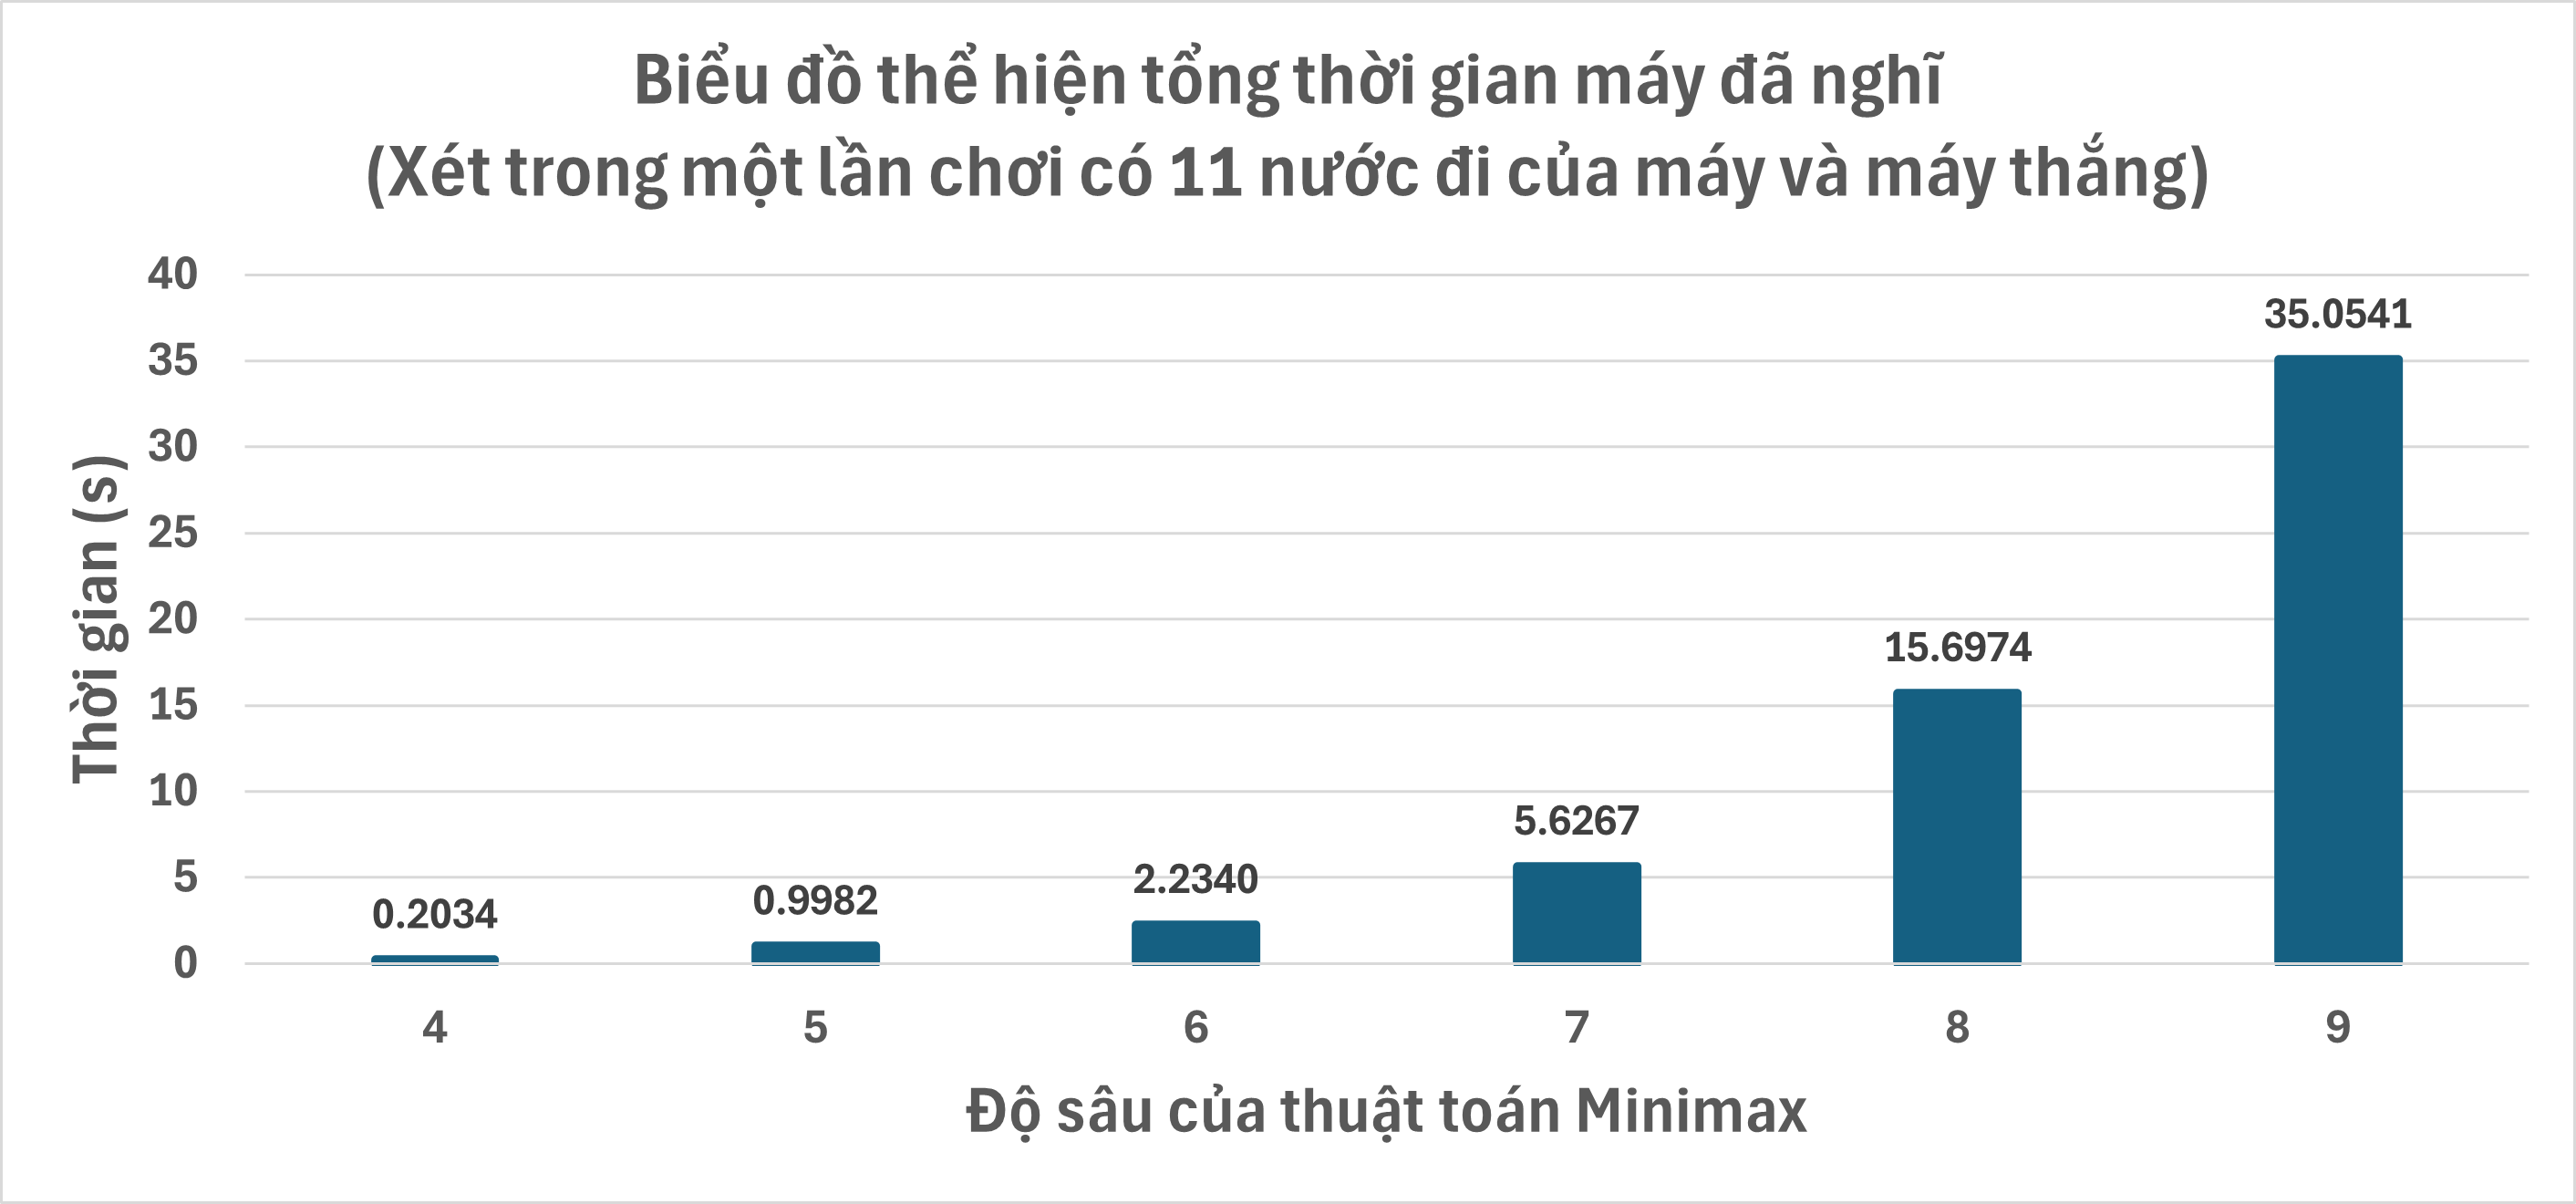


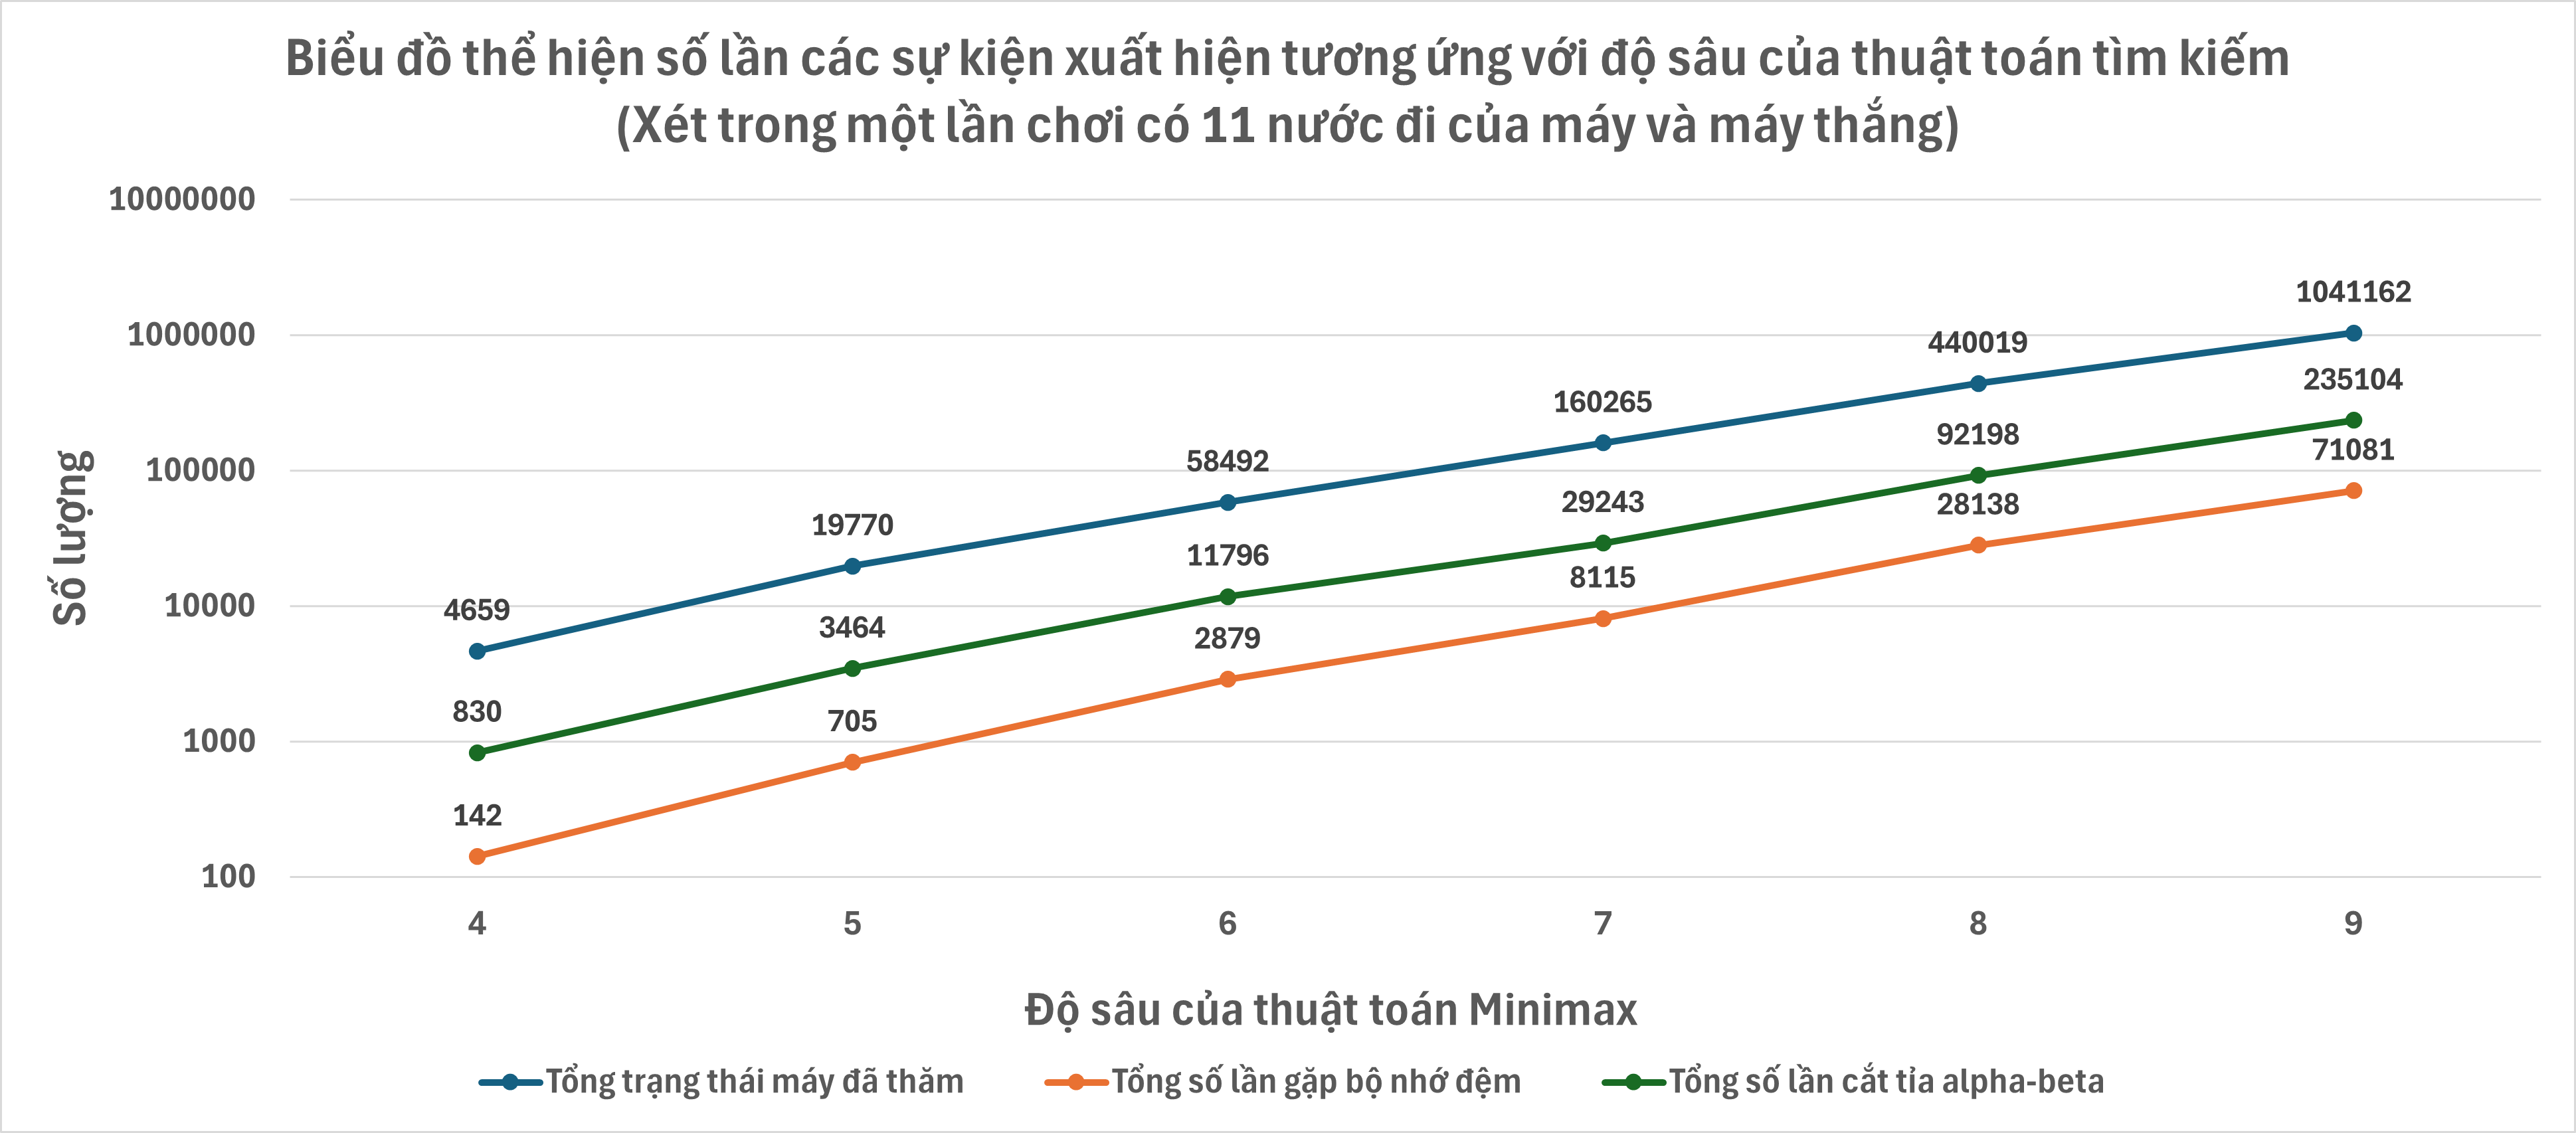


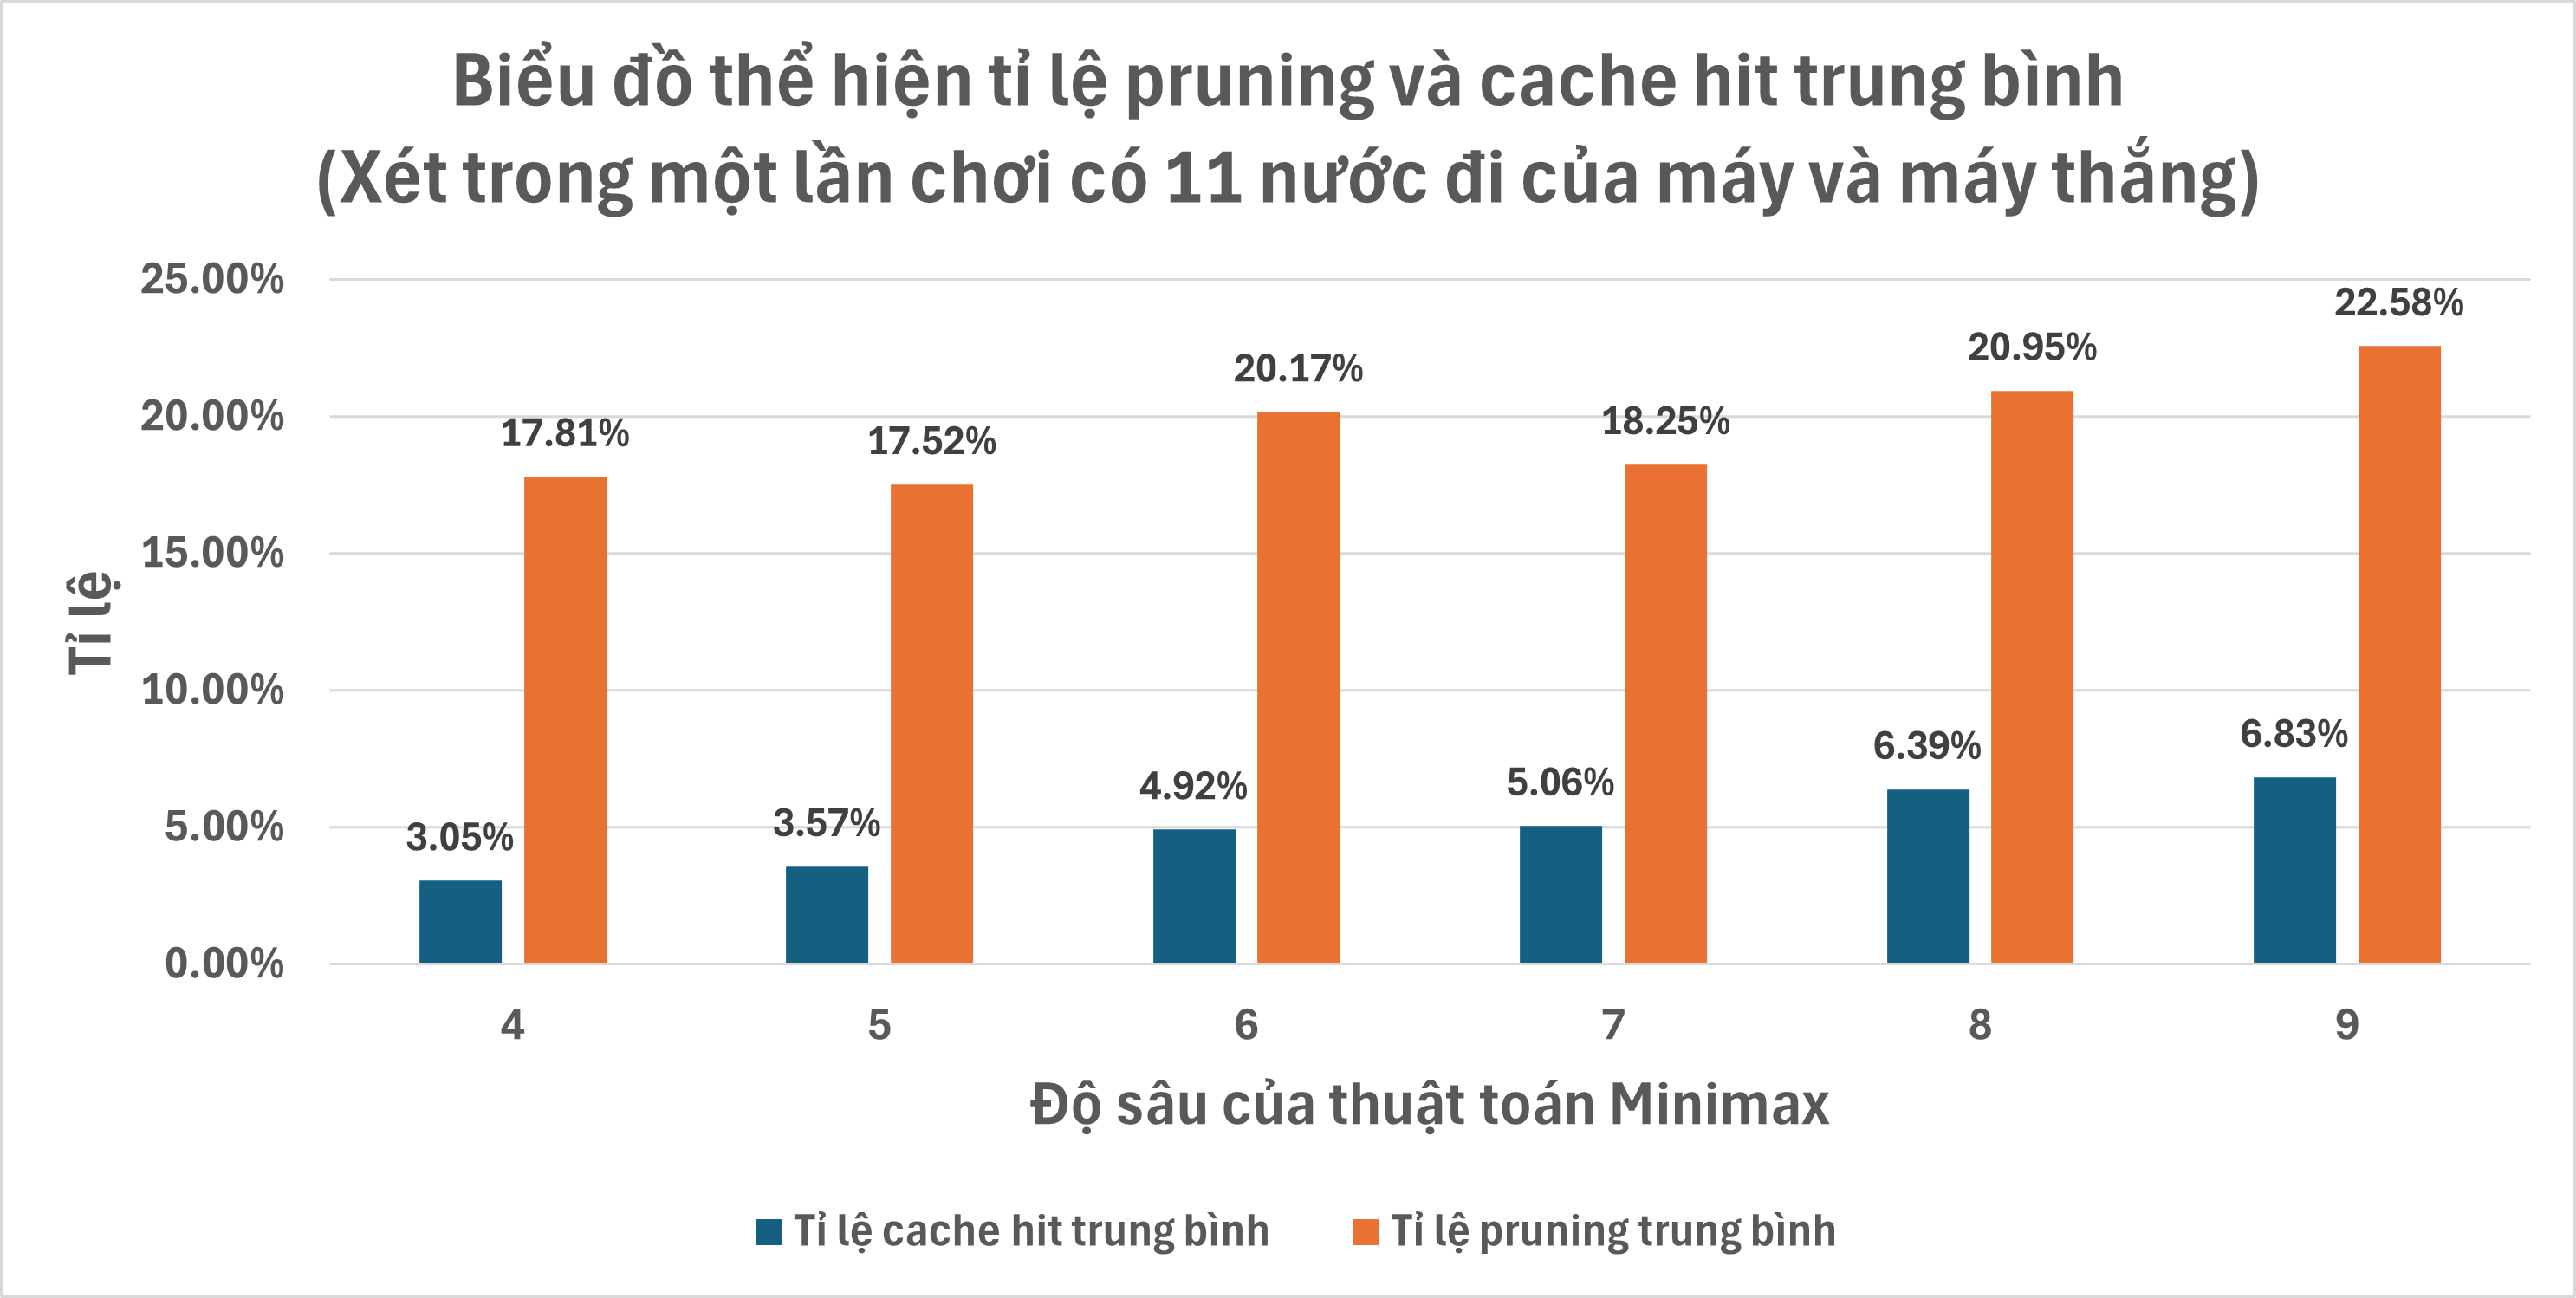


### Phân tích, đánh giá kết quả

#### Đánh giá về "độ thông minh" tương ứng với độ sâu tìm kiếm
Sau nhiều lần thử nghiệm, độ sâu thấp (ví dụ như depth = 1, 2, 3) thì dễ bị đánh bại hơn. Kể từ độ sâu tìm kiếm bằng 4 trở đi, máy có thể nhìn trước được một vài nước đi, nên rất khó để đánh bại. 
Độ sâu càng lớn thì máy càng phải xét nhiều nhánh và nhiều trạng thái để tìm nước đi tối ưu nên dễ bị chậm hơn
Nếu độ sâu quá lớn (ví dụ depth = 9) thì máy gần như không có đủ thời gian để chơi với người chơi

#### Cắt tỉa giúp loại bỏ nhiều nhánh không cần thiết
Tỉ lệ cắt tỉa vào cỡ 20% giúp thuật toán chạy nhanh hơn rất nhiều. Trên thực tế khi cắt tỉa, ta có thể loại bỏ được một nhánh trạng thái rất sâu, tránh loanh quanh trong phần đệ quy không cần thiết

#### Bảng cache giúp bỏ qua các trạng thái bị trùng ở nhánh cùng độ sâu khác
Việc thêm bảng cache để tránh tính toán lại giúp tăng tốc độ thực hiện lên cỡ 5%. Bởi lẽ, có một số trường hợp ở cùng một độ sâu tìm kiếm, trạng thái trò chơi trong quá trình đệ quy bị lặp lại giống như như trạng thái đã được khám phá ra từ trước đó. Ví dụ một trường hợp như sau:

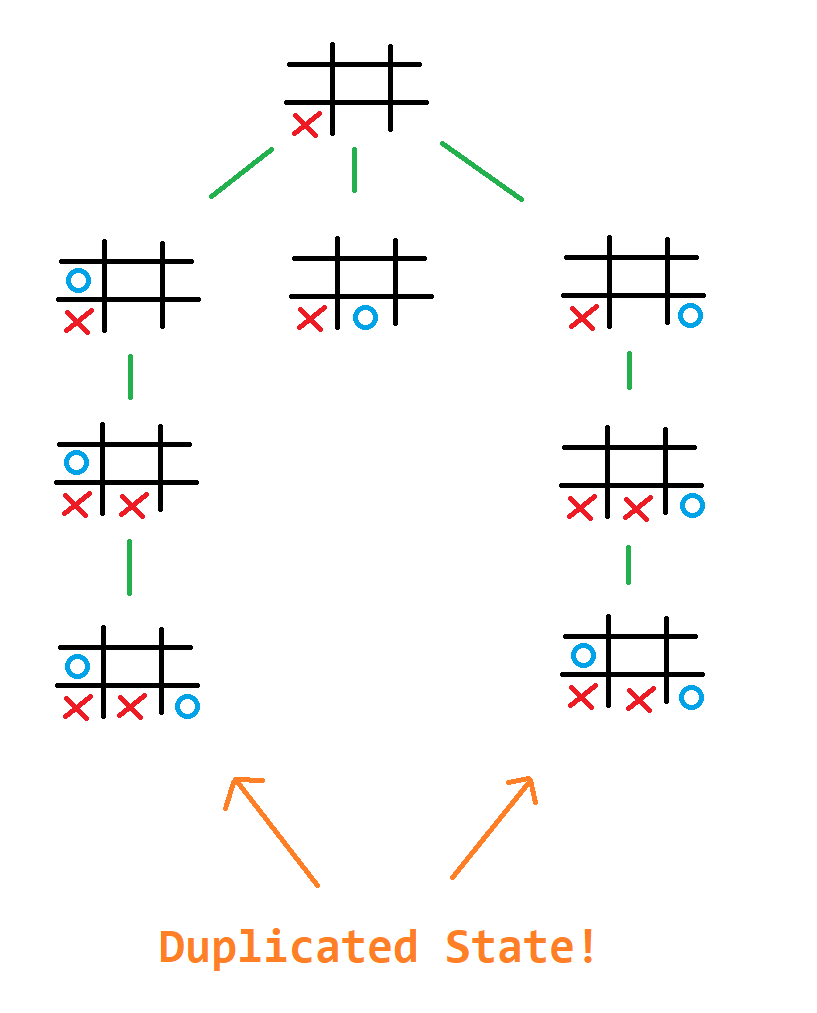

Trong thuật toán tận dụng bảng cache, đế tránh trường hợp chương trình dùng lại một kết quả bị "cận thị" (tức là một trạng thái được tổng hợp kết quả từ một quá trình đệ quy thấp quá từ trước đó) thì phải thêm một biến nữa trong quá trình thiết kế bảng cache, đó là "độ sâu đã nhìn trước được". Ta chỉ dùng lại những trạng thái đã lưu trong bảng cache mà có "mức nhìn trước" tốt hơn yêu cầu hiện tại.

Ví dụ, ở một trạng thái X, ta cần tính toán "mức nhìn trước" là depth = 2, thì ta chỉ dùng các kết quả Y có trong bảng cache mà có "mức nhìn trước" trong bảng cache cũng bằng 2, chứ không thể dùng một trạng thái "cận thị" chỉ có "mức nhìn trước" là 1 được




### Kết luận

Việc mô phỏng trò chơi Drop4 bằng thuật toán Minimax vẫn còn nhiều hạn chế về đồ họa, tuy nhiên việc thử mô phỏng trò chơi này đã giúp nhóm có thêm nhiều nhận xét sâu sắc hơn về thuật toán, cũng như chứng kiến tốc độ cải thiện thuật toán khi thêm các phương pháp tối ưu như cắt tỉa alpha-beta và bảng cache.

